<a href="https://colab.research.google.com/github/piziomo/Trainings/blob/main/Exploratory_Data_Analysis_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis with python


Exploratory Data Analysis (EDA) is the process of understanding the data by summarizing its main characteristics, often with visual methods and summary or descriptive statistics. The goal of EDA is to help you get a sense of the data, identify patterns, spot anomalies or outliers, test hypotheses and check assumptions before diving deeper into modeling or making predictions.



We use a dataset that shows personnel of the United Nations system by region, subregion and country of nationality.

We would like to answer the following questions:

Q1: What is the geographical distribution of UN employees?

Q2: What are the top five countries with the biggest number of UN employees?

Q3: How many empolyees of UNICEF is from UK?



In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

ValueError: mount failed

In [ ]:
# load the dataset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


path = "/content/drive/My Drive/IM952/"
data = pd.read_csv(path+'un_employee_by_nationality.csv')

In [ ]:
# Before analyzing the data let’s have a quick look at some insights
# we would also like to know if there are any missing or duplicated values

# check the first 3 rows
data.head(3)

,REGION,SUBREGION,COUNTRY,ORGCD,NATIO_ISO,YEAR,Total Sum of Count
0,Americas,Northern America,United States of America,UN,USA,2021,2445
1,Africa,Sub-Saharan Africa,Democratic Republic of the Congo,UN,COD,2021,1775
2,Africa,Sub-Saharan Africa,Kenya,UN,KEN,2021,1681


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3839 entries, 0 to 3838
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   REGION              3839 non-null   object
 1   SUBREGION           3839 non-null   object
 2   COUNTRY             3839 non-null   object
 3   ORGCD               3839 non-null   object
 4   NATIO_ISO           3839 non-null   object
 5   YEAR                3839 non-null   int64 
 6   Total Sum of Count  3839 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 210.1+ KB


In [ ]:
data.isnull().sum()
# there is no missing data

,0
REGION,0
SUBREGION,0
COUNTRY,0
ORGCD,0
NATIO_ISO,0
YEAR,0
Total Sum of Count,0


In [ ]:
data.duplicated().sum()
# there is no duplicated values

0

In [ ]:
### Q1: What is the geographical distribution of UN employees?
data.groupby('REGION')['Total Sum of Count'].sum()

,Total Sum of Count
REGION,
Africa,41922
Americas,17146
Asia,31233
Europe,27942
Not identified,17
Oceania,1610


<Axes: ylabel='Total Sum of Count'>

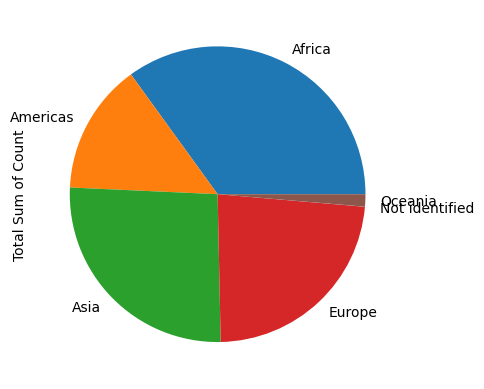

In [ ]:
## Let's make a pie chart to display this distribution

data.groupby('REGION')['Total Sum of Count'].sum().plot(kind='pie')


Text(0.5, 1.0, 'Geographical distribution of UN employees')

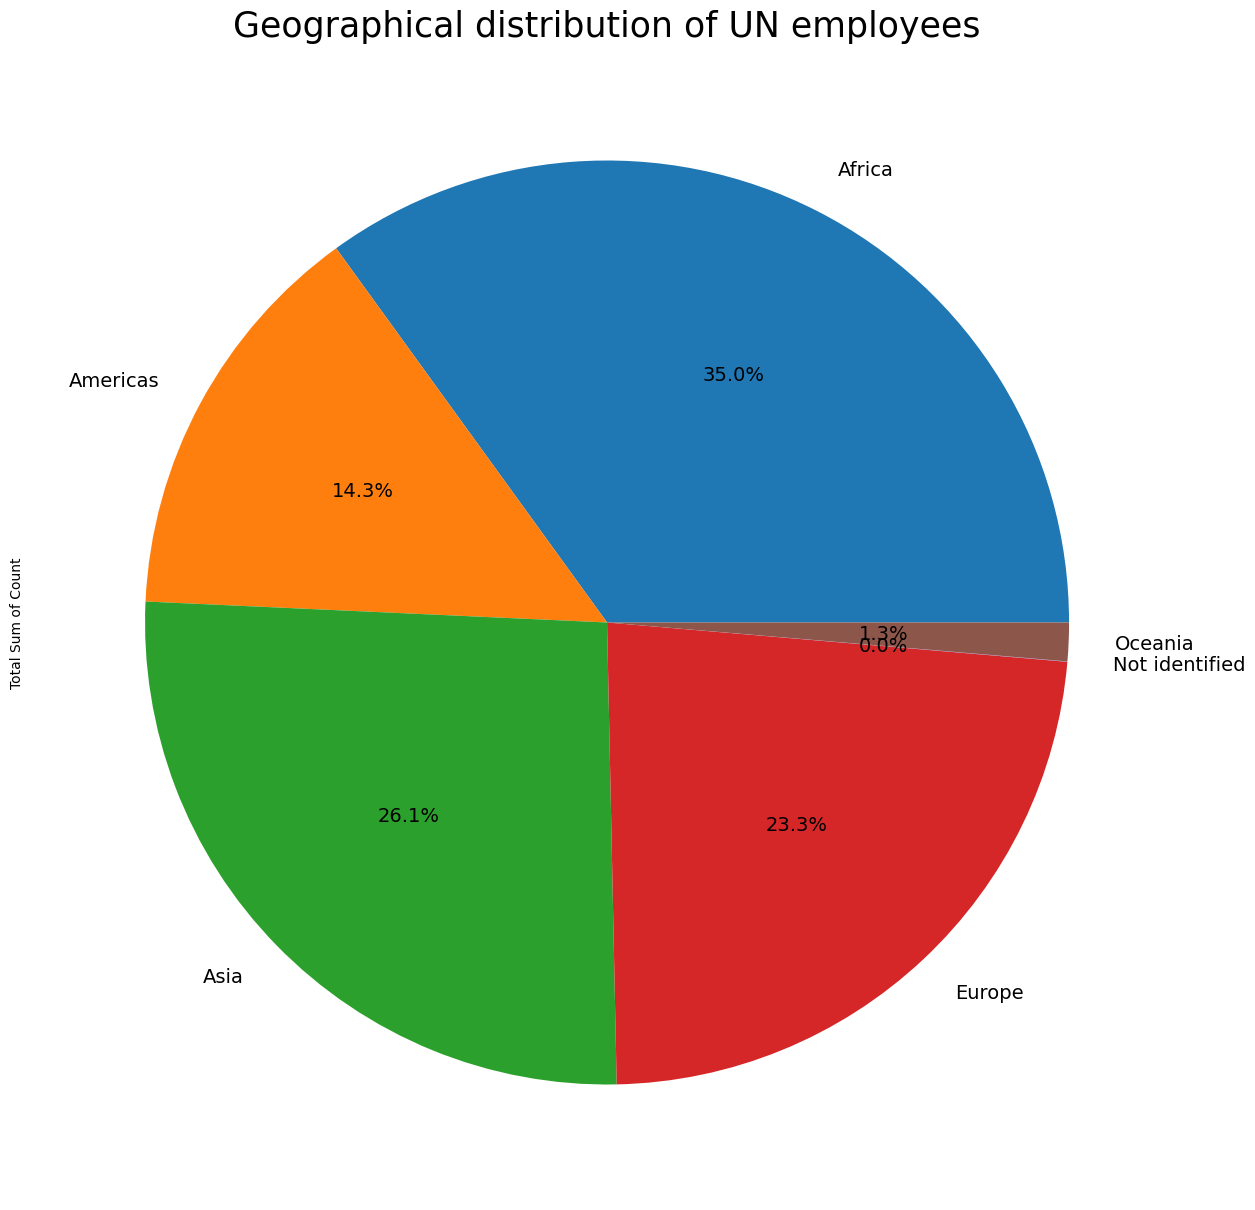

In [ ]:
## Let's make it look a bit better

data.groupby('REGION')['Total Sum of Count'].sum().plot(kind='pie', autopct='%1.1f%%',figsize=(15, 15),fontsize=14)
plt.title('Geographical distribution of UN employees',fontsize=25)


In [ ]:
### Q2: What are thr top five countries with the biggest number of UN employees?

data.groupby('COUNTRY')['Total Sum of Count'].sum()

,Total Sum of Count
COUNTRY,
Afghanistan,1997
Albania,193
Algeria,370
Andorra,4
Angola,163
...,...
Venezuela,400
Vietnam,428
Yemen,1205


In [ ]:
## Top five countries with the biggest number of UN employees
data.groupby('COUNTRY')['Total Sum of Count'].sum().nlargest(5)

,Total Sum of Count
COUNTRY,
United States of America,5567
France,4488
Kenya,3763
Italy,3700
Democratic Republic of the Congo,3100


In [ ]:
# Install the plotly package
!pip install plotly

In [ ]:
## Let's make a world map to display this distribution
import plotly.express as px

country = data.groupby('COUNTRY')['Total Sum of Count'].sum().reset_index()
country

,COUNTRY,Total Sum of Count
0,Afghanistan,1997
1,Albania,193
2,Algeria,370
3,Andorra,4
4,Angola,163
...,...,...
192,Venezuela,400
193,Vietnam,428
194,Yemen,1205
195,Zambia,459


In [ ]:
# Install pycountry package t
### convert country name to country code for plotting the map
# generate country code  based on country name
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.8 MB/s eta 0:00:00


In [ ]:
import pycountry


def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code
country['code']=alpha3code(country.COUNTRY)
country.head()

,COUNTRY,Total Sum of Count,code
0,Afghanistan,1997,AFG
1,Albania,193,ALB
2,Algeria,370,DZA
3,Andorra,4,AND
4,Angola,163,AGO


In [ ]:
fig = px.choropleth(country, locations="code",
                    color="Total Sum of Count",
                    hover_name="COUNTRY",
                    title = "Nationality distribution of UN employees",
                    color_continuous_scale=px.colors.sequential.Viridis)

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
## Why there are some countries' values missing in our map?
## Check United States of America

country[country['COUNTRY']=='United States of America']

# It seems that we failed to convert some countries' name to code


,COUNTRY,Total Sum of Count,code
188,United States of America,5567,None


In [ ]:
country[country['code']=='None']


,COUNTRY,Total Sum of Count,code
20,Bolivia,213,None
30,Cape Verde,78,None
42,Czech Republic,130,None
43,Democratic Republic of the Congo,3100,None
75,Iran,454,None
80,Ivory Coast,782,None
87,Kosovo (UN administered province of Serbia),87,None
90,Laos,224,None
95,Libyan Arab Jamahiriya,267,None
99,Macedonia,221,None


In [ ]:
missing_code={'Bolivia':'BOL','United States of America': 'USA'}

for code in missing_code.items():
    country['code'].loc[country['COUNTRY']==code[0]] = code[1]

<ipython-input-26-7bb47f337d88>:4: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-26-7bb47f337d88>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [ ]:
country[country['COUNTRY']=='United States of America']

,COUNTRY,Total Sum of Count,code
188,United States of America,5567,USA


In [ ]:
country[country['COUNTRY']=='Bolivia']

,COUNTRY,Total Sum of Count,code
20,Bolivia,213,BOL


In [ ]:
fig = px.choropleth(country, locations="code",
                    color="Total Sum of Count",
                    hover_name="COUNTRY",
                    title = "Nationality distribution of UN employees",
                    color_continuous_scale=px.colors.sequential.Viridis)

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
## Q3: How many empolyees of UNICEF is from UK?

UK=data[(data['COUNTRY']=='United Kingdom') ]

UK[UK['ORGCD']=='UNICEF']



,REGION,SUBREGION,COUNTRY,ORGCD,NATIO_ISO,YEAR,Total Sum of Count
89,Europe,Northern Europe,United Kingdom,UNICEF,GBR,2021,247


In [ ]:
def find_country_org(country,org):
    country =data[data['COUNTRY']==country]
    find=country[country['ORGCD']==org]
    return find

print(find_country_org('United Kingdom','UNICEF'))

    REGION        SUBREGION         COUNTRY   ORGCD NATIO_ISO  YEAR  \
89  Europe  Northern Europe  United Kingdom  UNICEF       GBR  2021   

    Total Sum of Count  
89                 247  
